# Learning Open CV

Thought of exploring __**Computer Vision**__

In [ ]:
pip install opencv-python

In [21]:
#Importing open cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Function to return coordinates of a pixel
This won't do anything in notebook though

In [3]:
def mouse_callback( event, y, x, flag, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(f"Cursor Coordinates: ({x}, {y})")


### Function to show images in the matplotlib
cv2.imshow() works too

In [4]:
def show( image, title = "", axes = "on"):
    plt.title(title)
    plt.axis(axes)
    plt.imshow(image)
    plt.show()

### Loading the images

In [13]:
image = cv2.imread(r'image.jpg')
image2 = cv2.imread(r'image.jpg')
#Cob=nverting to RGB, since the images in CV are in BGR format by default
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

### Properties of the image

In [6]:
height, width, channels = image.shape
print(f"Image Dimensions: {height} x {width}")
print(f"Number of Channels: {channels}")

mean_intensity = np.mean(image)
std_intensity = np.std(image)
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")

data_type = image.dtype
print(f"Image Data Type: {data_type}")


Image Dimensions: 427 x 817
Number of Channels: 3
Mean Intensity: 117.93044467822243
Standard Deviation: 59.95789996622192
Image Data Type: uint8


### Creating a named window and displaying the images
> Manipulation is only on the image 2.

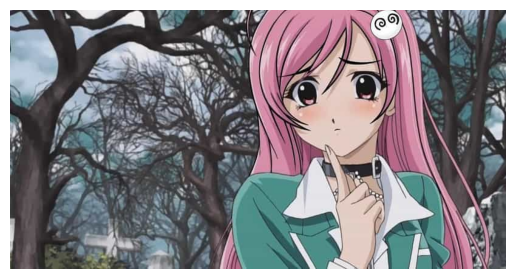

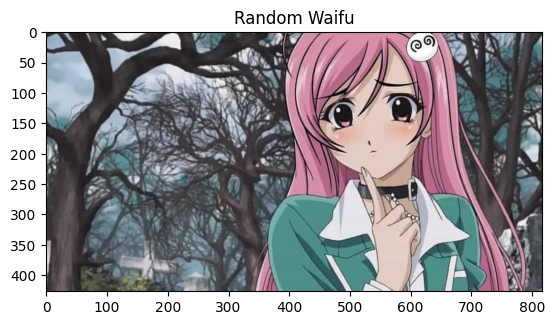

In [7]:
cv2.namedWindow('Random Waifu')
cv2.setMouseCallback('Random Waifu', mouse_callback)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

show(image2, "Random Waifu")


### Manipulating pixel values
Modifying and Marking pixels

Pixel Value at (184, 532): [61 38 30]


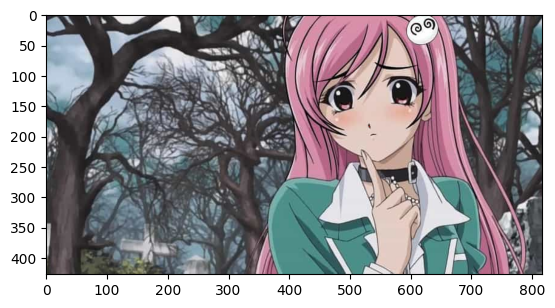

In [8]:
pixel_value = image2[184, 532]
print(f"Pixel Value at (184, 532): {pixel_value}")
image2[184, 532] = [255, 0, 0]
show(image2)
#cv2.circle(image2, (200, 300), 5, (255, 0, 0), -1)
#show(image2)


### Converting the image to grayscale
By replacing the pixel with corresponding average of RGB values

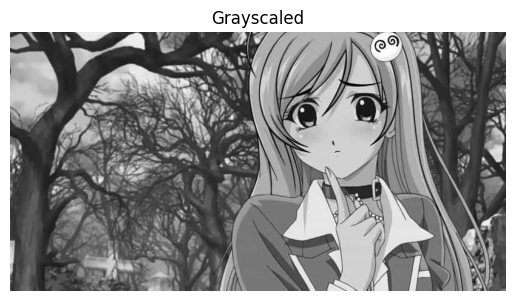

In [9]:
for row in range(height):
    for column in range(width):
        gray_value = sum(image[row, column])//3
        image2[row, column]=[gray_value]*3
show(image2, "Grayscaled", axes = "off")

### Drawing basic shapes

Drawing a line, circle and rectangle

The images are generally superposition of 3 layers Red, Green, Blue. 

So if an image is 500x500 pixels, it means 3 layers of 500x500 pixels with each layer corresponding to Red, Green and Blue intensities.

>4 Layers:
>One common example of using 4 layers is for a color representation called CMYK (Cyan, Magenta, Yellow, Key/Black). This is often used in printing, where each layer represents one of these colors along with a separate black layer for improved contrast.

A Line

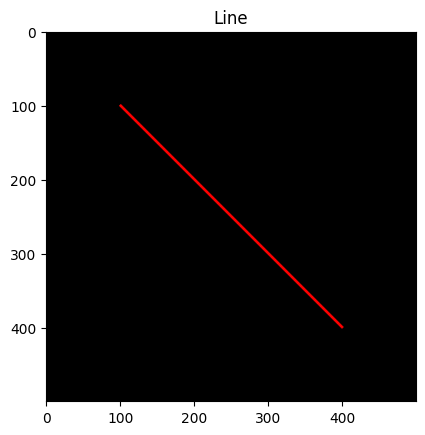

In [10]:
#Creating a blank image
image3 = np.zeros((500, 500, 3), int)

# Draw a red line from (100, 100) to (400, 400) with thickness 2
cv2.line(image3, (100, 100), (400, 400), (255, 0, 0), 2)
show(image3, "Line")




A Circle

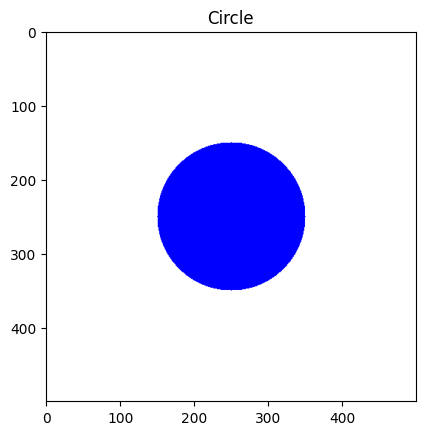

In [11]:
image3 = np.ones((500, 500, 3), int)*255  # Every pixel to max intensity = White

# Draw a blue circle with center (250, 250) and radius 100
cv2.circle(image3, (250, 250), 100, (0, 0, 255), -1)  #-1 fills the circle
show(image3, "Circle" )

### Blurring and types of blurring
 By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high-frequency content, such as noise and edges (i.e., the “detail” of an image).

 This allows us to focus on the larger structural objects in the image.

 [Read More Here](https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/)

#### Normal Blurring
Just as the name suggests

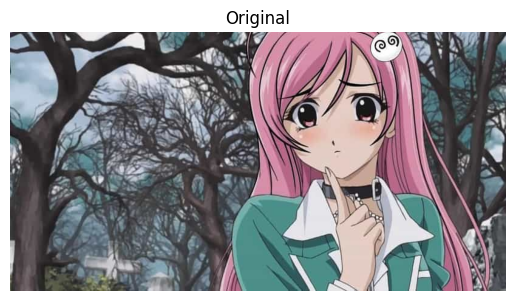

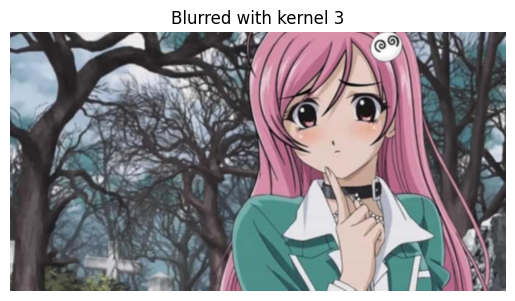

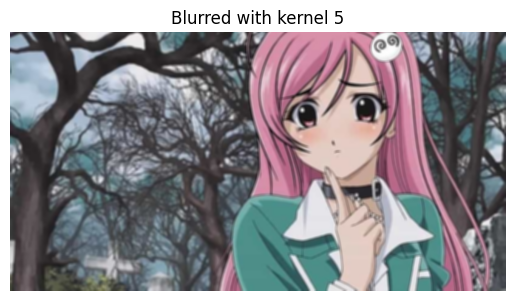

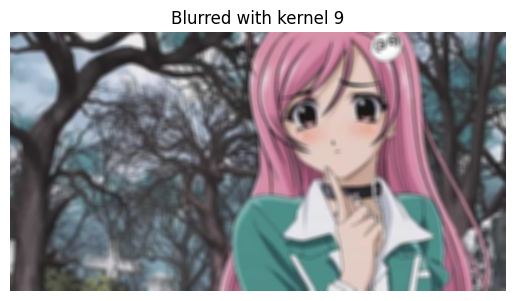

In [22]:
kernels = [(3,3), (5,5), (9, 9)]
show(image2, "Original", "off")
normal_blur = None
for x, y in kernels:
    blurred = cv2.blur(image2, (x, y))
    show(blurred, "Blurred with kernel {}".format(x), "off")
    normal_blur = blurred


#### Gaussian Blur

Weighted blur, more natural blur, generally recommended.

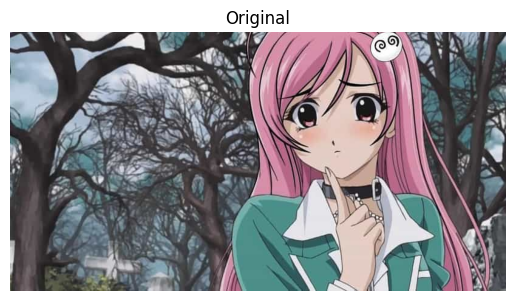

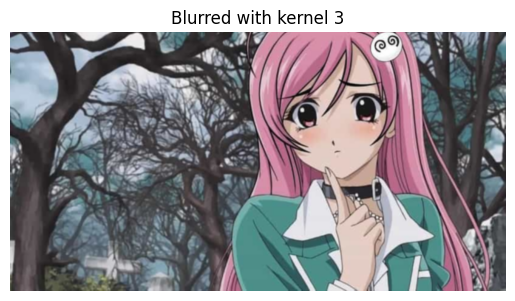

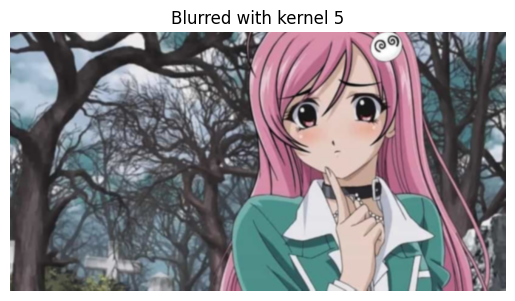

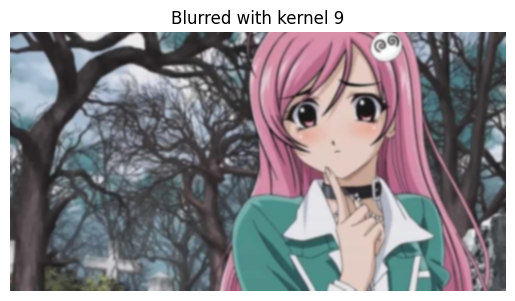

In [23]:
gaussian_blur = None
show(image2, "Original", "off")
for x, y in kernels:
    blurred = cv2.GaussianBlur(image2, (x, y), 0)
    show(blurred, "Blurred with kernel {}".format(x), "off")
    gaussian_blur = blurred

#### Median Blur
Used for removing salt-and-pepper noise, restoring damaged photos and removing details from an image ( just like reducing graphics in any game :grinning: )

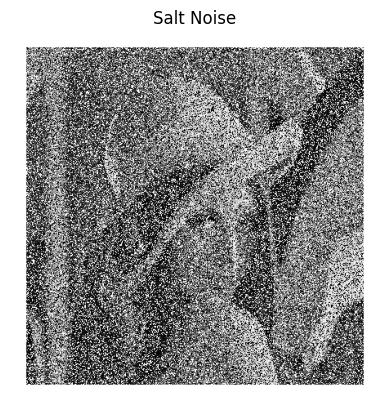

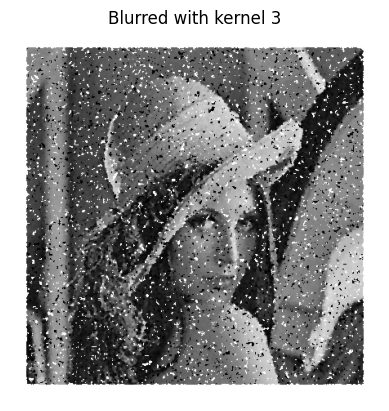

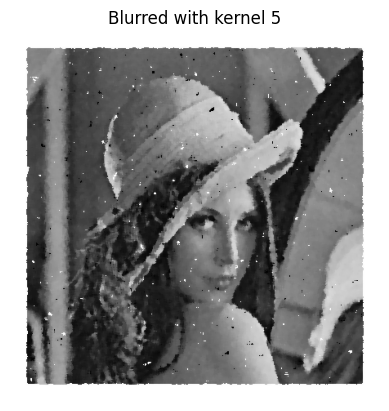

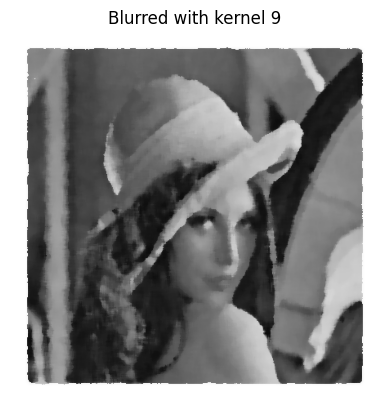

In [26]:
temp = cv2.imread(r"salt-noise.jpg")
show(temp, "Salt Noise", "off")
median_blur = None
for x, y in kernels:
    blurred = cv2.medianBlur(temp, x)
    show(blurred, "Blurred with kernel {}".format(x), "off")
    median_blur = cv2.medianBlur(image2, 9)


#### Bilateral blurring

Blur while maintaining the edges.
A little slow but various applications

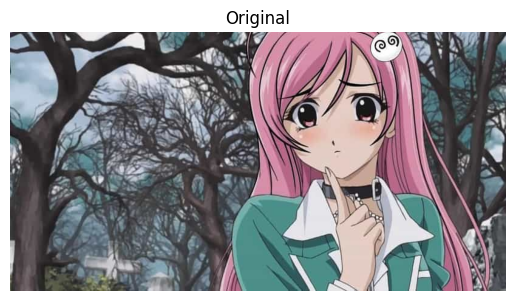

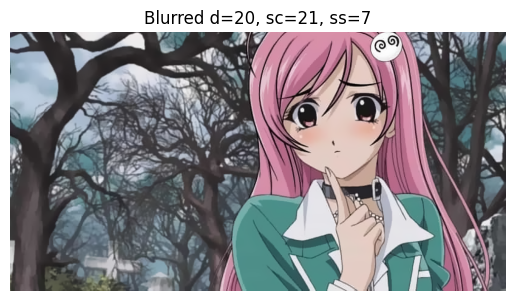

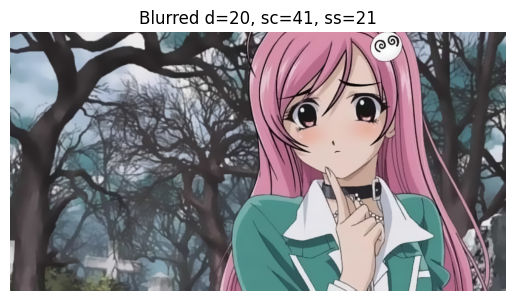

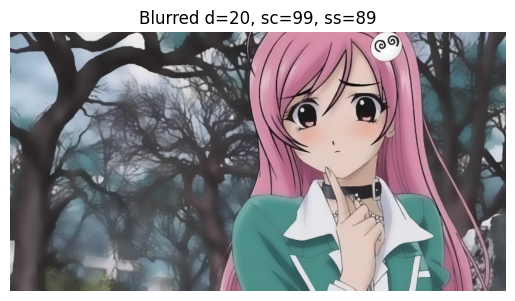

In [38]:
bilateral_blur = None
params = [(20, 21, 7), (20, 41, 21), (20, 99, 89)]
show(image2, "Original", "off")
for (diameter, sigmaColor, sigmaSpace) in params:
    blurred = cv2.bilateralFilter(image2, diameter, sigmaColor, sigmaSpace)
    show(blurred, "Blurred d={}, sc={}, ss={}".format(diameter, sigmaColor, sigmaSpace), "off")
    bilateral_blur = blurred

### Comparing the blurs


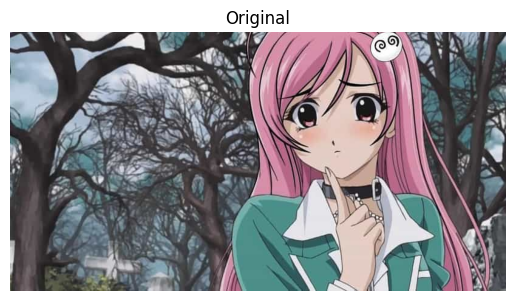

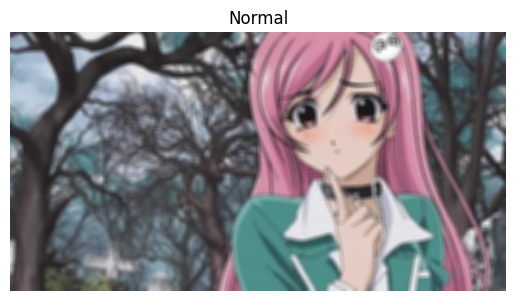

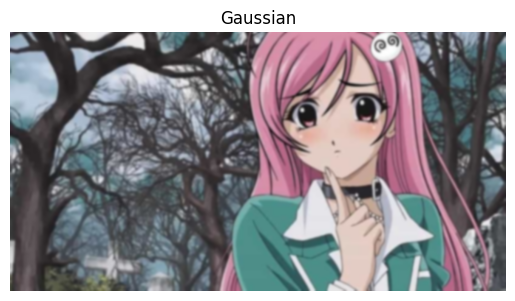

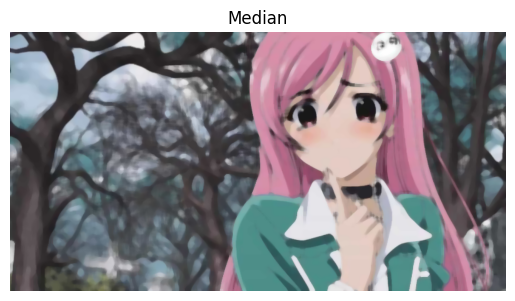

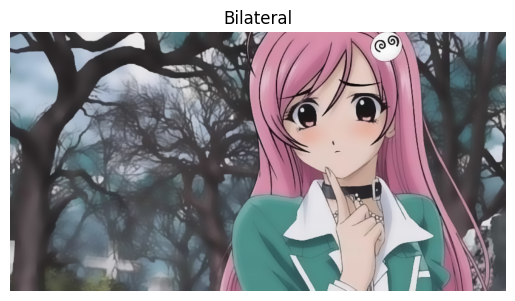

In [44]:
images = {"Normal" : normal_blur,  "Gaussian" : gaussian_blur, "Median" : median_blur, "Bilateral" : bilateral_blur}
show(image2, "Original", "off")
for name, type in images.items():
    show(type, "{}".format(name), "off")